In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import brokenaxes

In [2]:
file_path = "/Users/aryellewright/Documents/Kumar-Biomaterials-Lab/PicoGreen_Plots/20231019_PicoGreenRepeat_PolymerScreen.xlsx" 
sheet_name = "Sheet2"  

df = pd.read_excel(file_path, sheet_name=sheet_name)


In [3]:
polyplex = df['Polyplex']
avg = df['Avg. %']
stdev = df['Final std']


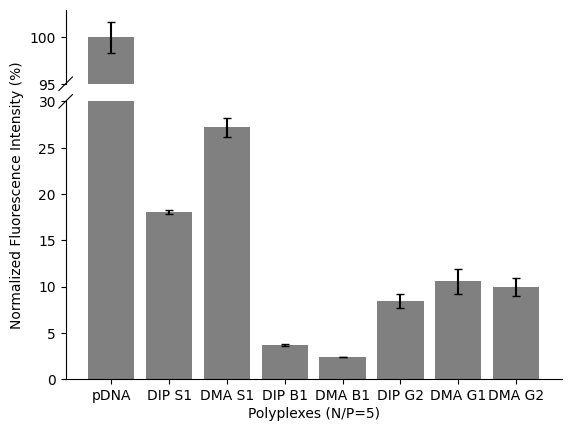

In [4]:
num_polymer = polyplex.nunique()
colors = sns.color_palette("colorblind", num_polymer)

bax = brokenaxes.brokenaxes(ylims=((0, 30), (95, 103)),  hspace=0.1)
bax.bar(polyplex, avg, yerr=stdev, capsize = 3, color='gray')

bax.set_xlabel('Polyplexes (N/P=5)', labelpad=20)
bax.set_ylabel('Normalized Fluorescence Intensity (%)')
plt.show()